## K-Mean/Hierachial Clustering Assignment
#### By:- Sidharth Singh

**Importing Libraries**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

**Reading Data**

In [66]:
df = pd.read_csv('Country-data.csv')

In [67]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [68]:
df.shape

(167, 10)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Null checking**

In [70]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Detecting outliers**

In [71]:
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


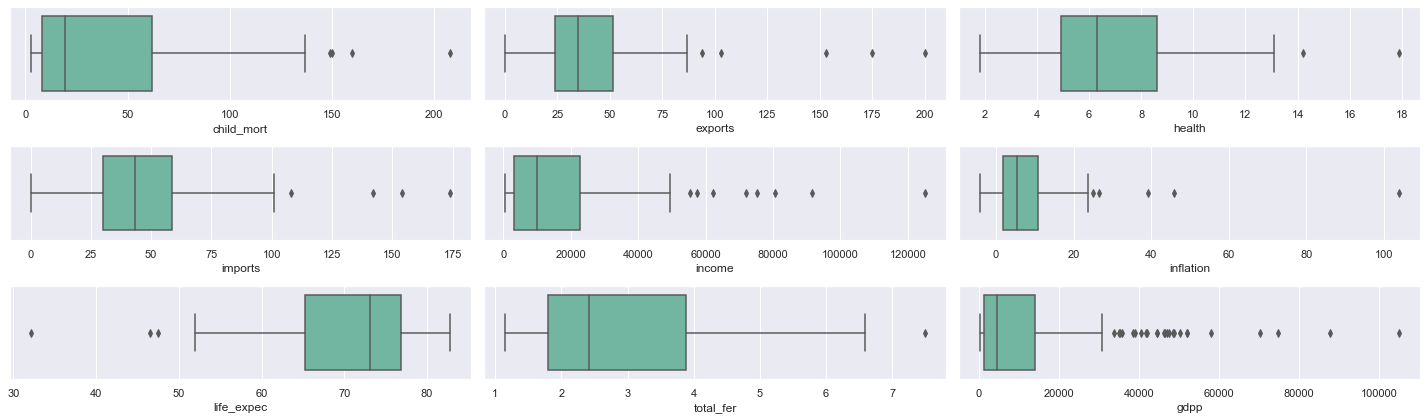

In [72]:
plt.figure(figsize=(20, 6))
plt.subplot(3,3,1)
sns.boxplot(df.child_mort,palette="Set2")
plt.subplot(3,3,2)
sns.boxplot(df.exports,palette="Set2")
plt.subplot(3,3,3)
sns.boxplot(df.health,palette="Set2")
plt.subplot(3,3,4)
sns.boxplot(df.imports,palette="Set2")
plt.subplot(3,3,5)
sns.boxplot(df.income,palette="Set2")
plt.subplot(3,3,6)
sns.boxplot(df.inflation,palette="Set2")
plt.subplot(3,3,7)
sns.boxplot(df.life_expec,palette="Set2")
plt.subplot(3,3,8)
sns.boxplot(df.total_fer,palette="Set2")
plt.subplot(3,3,9)
sns.boxplot(df.gdpp,palette="Set2")
plt.tight_layout()

We can observe that **child_mort**, **exports**, **income**, **inflation**, **gdpp** have high outliers. Although we are not going to handle the outlier as it might impact the results.

In [73]:
df.set_index('country',inplace = True)

## **Visulation - Pairplot**

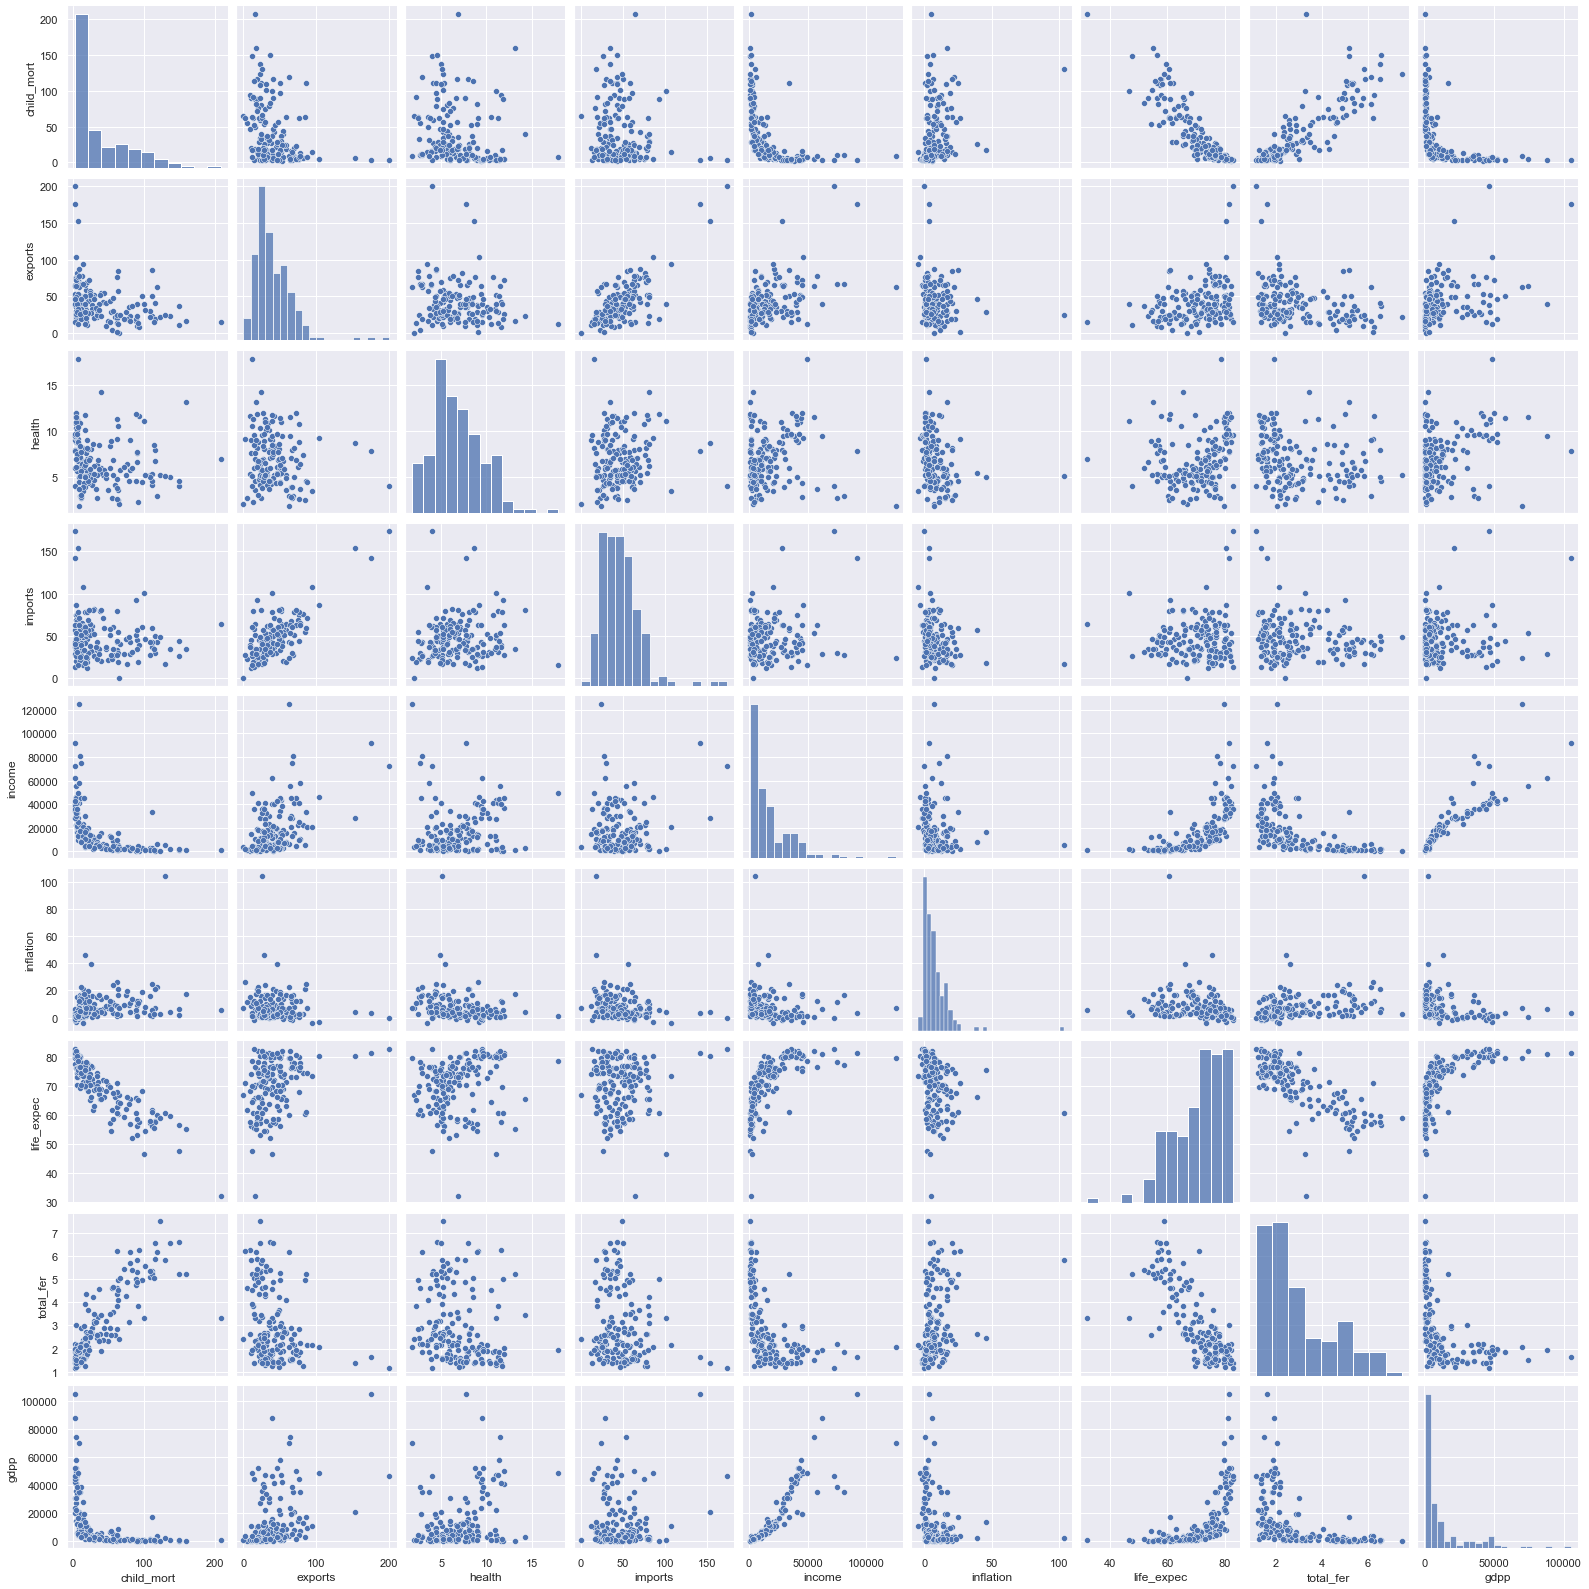

In [74]:
sns.pairplot(df)
plt.show()

**Check Correlation**

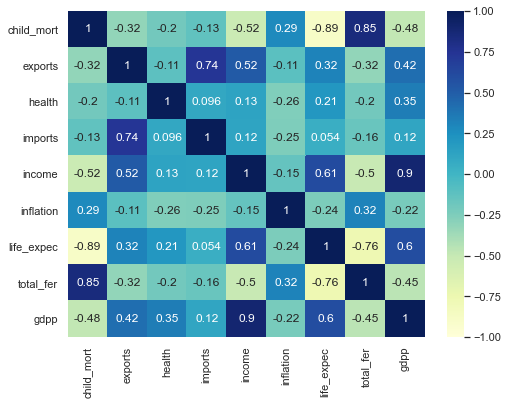

In [75]:
plt.figure(figsize = (8,6))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu",vmin=-1,vmax=1)
plt.show()

We can observe some high correlation between features:
 - `total_fer` and `child_mort`
 - `gdpp` and `income`
 - `imports` and `exports`

## **Feature Scaling**

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
country_scaler = scaler.fit_transform(df)

In [78]:
country_scaler = pd.DataFrame(country_scaler)
country_scaler.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_scaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## **Hopkin's Statistics**

In [79]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [80]:
hopkins(country_scaler)

0.8900465551288185

Since it's value is **greater** then `0.7`, Hence dataset will form good clusters

### Importing **K-Means** Library and evaluation metrics **silhouette_score**

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_scaler)
    sse.append([k, silhouette_score(country_scaler, kmeans.labels_)])

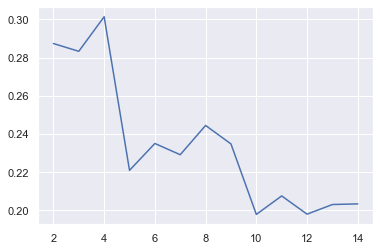

In [83]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.show()

In [84]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(country_scaler)
    distortions.append(kmeanModel.inertia_)

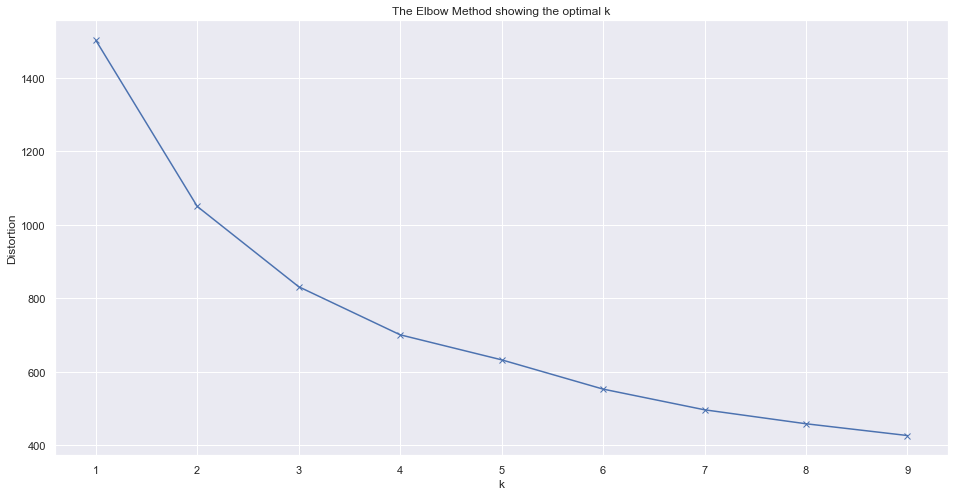

In [85]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that by looking `silhouette analysis` and by `elbow method`, we see the highest peak is at **k = 5**  and in elbow, we see that the range of **3 to 6**, so we will go with value of k as **5**.

## **K-Means Clustering with K= 5**

In [86]:
model_clus = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus.fit(country_scaler)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [87]:
df_km1 = country_scaler
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km = pd.concat([df_km1, pd.Series(model_clus.labels_)], axis=1)
countries_detail_km.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','ClusterID']
countries_detail_km.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,4
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,4
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,1
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,1
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,3
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,3
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,1


In [88]:
countries_detail_km['ClusterID'].value_counts()

4    50
0    46
1    38
3    30
2     3
Name: ClusterID, dtype: int64

In [89]:
df_cluster = pd.concat([df.reset_index(),countries_detail_km['ClusterID']],axis=1)

In [90]:
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


**Data Visualization - Scatterplot**

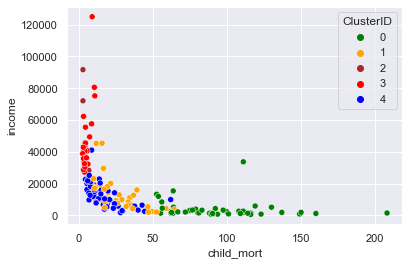

In [91]:
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=df_cluster,palette=['green','orange','brown','red','blue'])
plt.show()

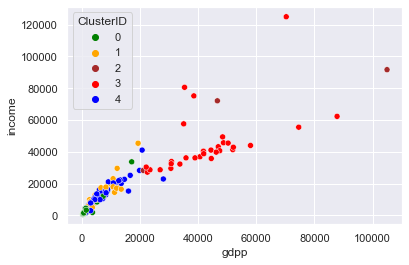

In [92]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=df_cluster,palette=['green','orange','brown','red','blue'])
plt.show()

#### List of countries lies in which clusters

In [93]:
df_cluster[df_cluster['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0


In [94]:
df_cluster[df_cluster['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,1
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,1
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,1
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,1
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.410,74.2,1.80,11200,1
33,Chile,8.7,37.700,7.96,31.3000,19400,8.960,79.1,1.88,12900,1
34,China,15.7,26.300,5.07,22.6000,9530,6.940,74.6,1.59,4560,1
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.860,76.4,2.01,6250,1


In [95]:
df_cluster[df_cluster['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [96]:
df_cluster[df_cluster['ClusterID']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3


In [97]:
df_cluster[df_cluster['ClusterID']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,4
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,4
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,4
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,4
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,4
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,4
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,4
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,4
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,4


#### Cluster Analysis

In [98]:
child_mort_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).child_mort.mean())
exports_mean= 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).exports.mean())
health_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).health.mean())
imports_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).imports.mean())
income_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).income.mean())
inflat_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).gdpp.mean())

In [99]:
df_cluster_analysis = pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [100]:
df_cluster_analysis.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_cluster_analysis

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,94.180435,28.928478,6.344565,42.502174,3752.021739,11.920109,59.013043,5.017826,1866.347826
1,1,26.910526,29.257605,5.369737,31.041208,12964.473684,12.294105,72.621053,2.518684,6175.421053
2,2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
4,4,17.504000,50.398000,6.937600,60.678000,12966.400000,3.887900,73.060000,2.155600,7435.920000


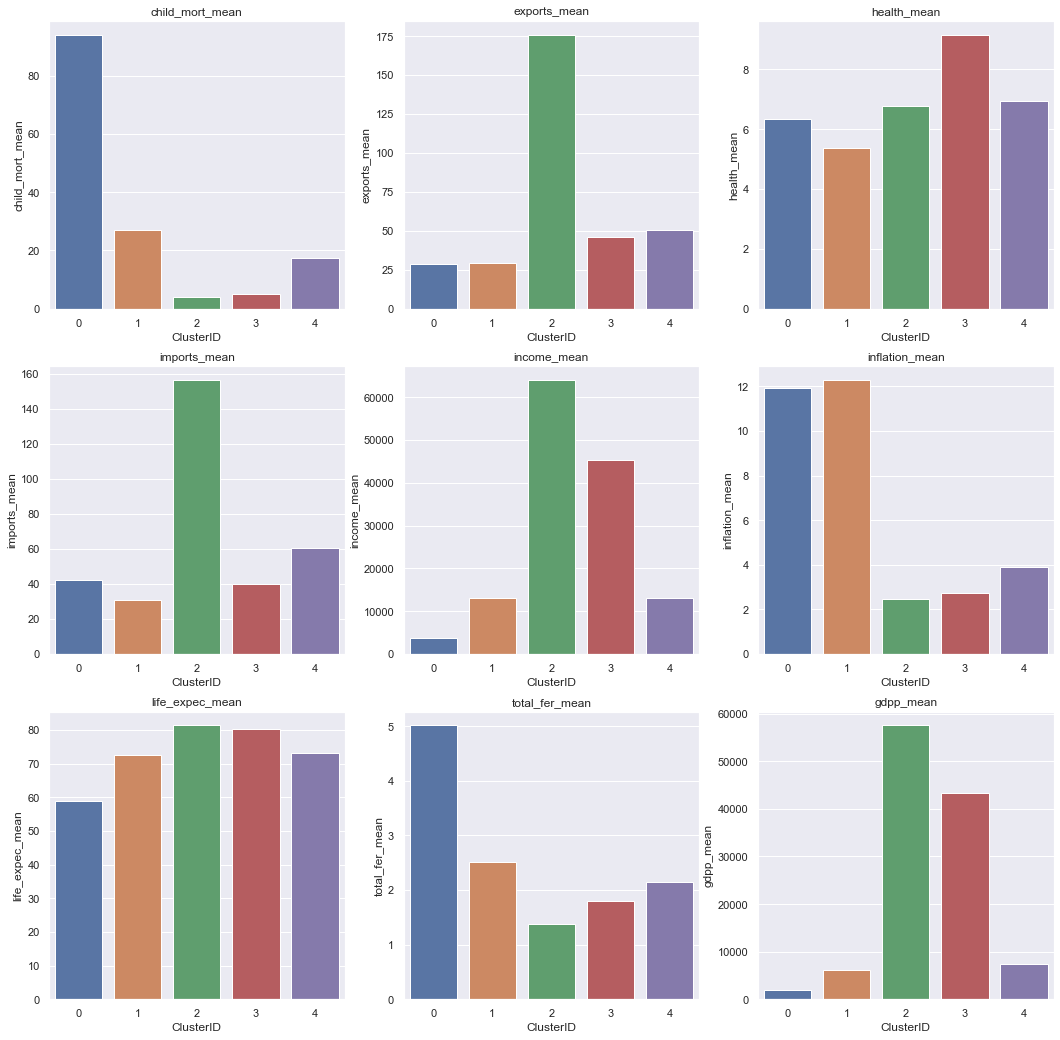

In [101]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.gdpp_mean)

plt.show()

By observing `Cluster 0` will be our concern.
- High child mortality rate
- Low income
- Low GDP
- High total fertility
- Low life expentancy
 

In [102]:
cluster_km=df_cluster[df_cluster['ClusterID']==0]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0


### **Inference K-Mean:**

The country which need helping hand are below:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10.Eritrea


## **Hierarchial Clustering**

In [103]:
# Hierarchial Clustering imports
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

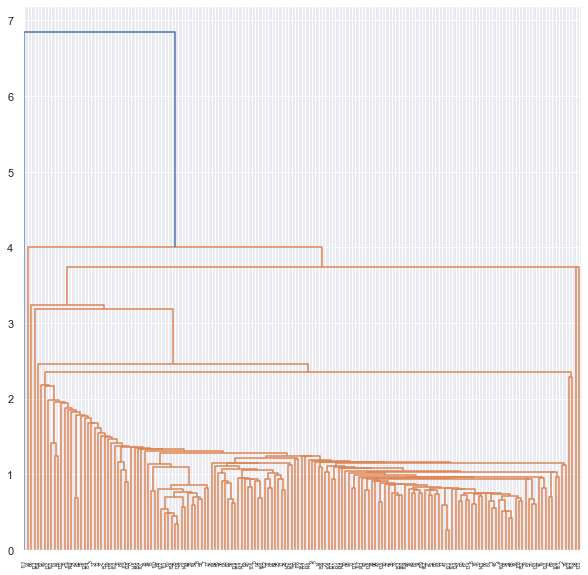

In [104]:
# Hierarchial Clustering with single method
df_clustering = country_scaler
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

Single method in clustering is not very clear to determine the k value

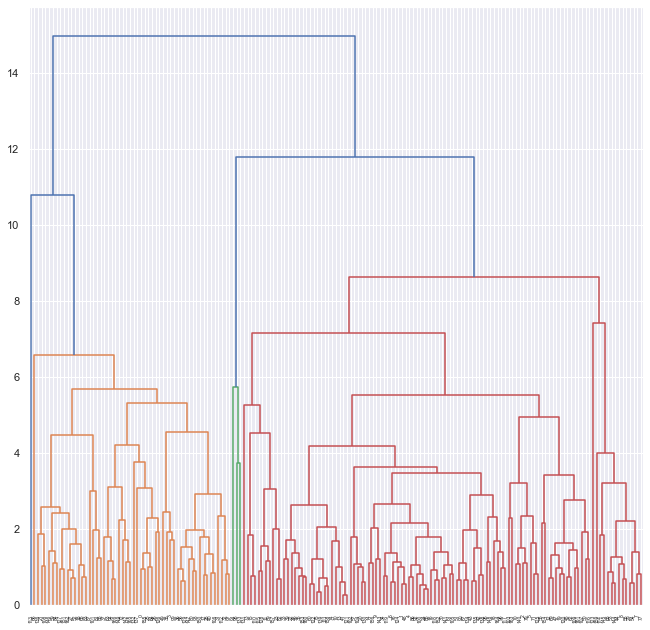

In [105]:
# Hierarchial Clustering with complete method
fig = plt.figure(figsize = (11,11))
mergings = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

With complete method we can determine with this dendogram that  `k = 5`

In [106]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))

In [107]:
country_hc = pd.concat([df.reset_index(), clusterCut], axis=1)
country_hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',
                  'ClusterID']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [108]:
country_hc['ClusterID'].value_counts()

1    95
0    54
2    14
3     3
4     1
Name: ClusterID, dtype: int64

### **Data Visualization - Scatterplot**

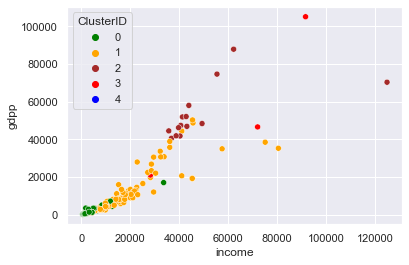

In [109]:
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red','blue'])
plt.show()

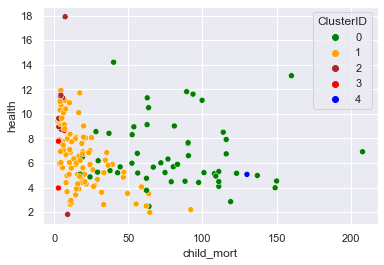

In [110]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red','blue'])
plt.show()

#### Analysis of the clusters:

In [111]:
child_mort_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
exports_mean_hc= 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
health_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
imports_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
income_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
inflat_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
life_expec_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [112]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [113]:
country_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,81.344444,31.520741,6.660185,49.111111,3787.462963,8.926389,60.555556,4.697037,1910.074074
1,1,18.874737,42.718726,6.410842,44.488062,18582.000000,7.124495,74.478947,2.142000,11941.473684
2,2,4.500000,39.392857,10.292143,33.207143,49721.428571,2.093571,80.892857,1.800000,53742.857143
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


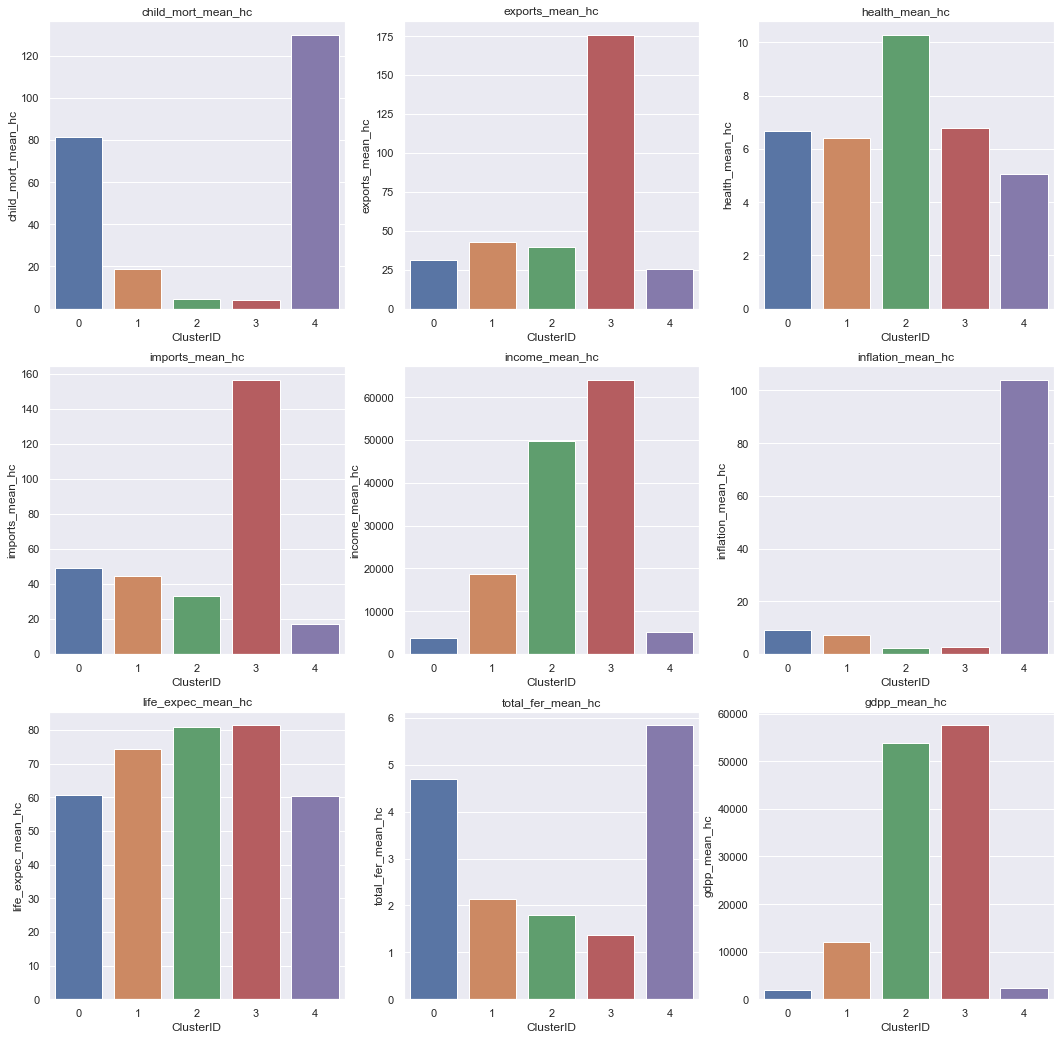

In [114]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.gdpp_mean_hc)

plt.show()

By observing `Cluster 0` will be our concern.
- High child mortality rate
- Low income
- Low GDP
- High total fertility
- Low life expentancy
 

In [115]:
cluster_hc=country_hc[country_hc['ClusterID']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0


### **Inference Hierarchial Clustering:**

We can observe that countries are same by both K-means and Heirarchical Clustering: 
Therefore following are the common countries which are in need of aid:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi